# **Stack Overflow QA Quality Classification**

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

**Importing the dataset**

https://www.kaggle.com/imoore/60k-stack-overflow-questions-with-quality-rate

In [2]:
training_df = pd.read_csv('/content/train.csv')

training_df

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ
...,...,...,...,...,...,...
44995,60461435,Convert List<String> to string C# - asp.net - ...,<p>I am new to this and I am asking for help t...,<c#><asp.net><sql-server>,2020-02-29 02:22:18,LQ_CLOSE
44996,60461754,Does Python execute code from the top or botto...,<p>I am working on learning Python and was won...,<python>,2020-02-29 03:33:59,LQ_CLOSE
44997,60462001,how to change payment date in Azure?,<p>It looks like it costs 8 days per month in ...,<azure><billing>,2020-02-29 04:34:16,LQ_CLOSE
44998,60465318,how to implement fill in the blank in Swift,"<p>""I _____ any questions.""</p>\n\n<p>I want t...",<ios><swift>,2020-02-29 12:50:43,LQ_CLOSE


In [3]:
test_df = pd.read_csv('/content/valid.csv')

test_df

,Id,Title,Body,Tags,CreationDate,Y
0,34552974,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT
1,34554721,Retrieve all except some data of the another t...,I have two table m_master and tbl_appointment\...,<php><mysql><sql><codeigniter><mysqli>,2016-01-01 08:43:50,LQ_EDIT
2,34555135,Pandas: read_html,<p>I'm trying to extract US states from wiki U...,<python><pandas>,2016-01-01 09:55:22,HQ
3,34555448,Reader Always gimme NULL,"I'm so new to C#, I wanna make an application ...",<sql-server><c#-4.0>,2016-01-01 10:43:45,LQ_EDIT
4,34555752,php rearrange array elements based on condition,basically i have this array:\r\n\r\n array(...,<php>,2016-01-01 11:34:09,LQ_EDIT
...,...,...,...,...,...,...
14995,60465681,How can I align two flex boxes to follow each ...,"<p>I have a menu, and I'd like the div.right-c...",<html><css><flexbox>,2020-02-29 13:32:56,LQ_CLOSE
14996,60467932,C++ The correct way to multiply an integer and...,<p>I try to multiply an integer by a double bu...,<c++>,2020-02-29 17:46:41,LQ_CLOSE
14997,60468378,WHY DJANGO IS SHOWING ME THIS ERROR WHEN I TRY...,*URLS.PY*\r\n //URLS.PY FILE\r\n fro...,<django><django-views><django-templates>,2020-02-29 18:35:39,LQ_EDIT
14998,60469392,PHP - getting the content of php page,<p>I have a controller inside which a server i...,<javascript><php><html>,2020-02-29 20:32:14,LQ_CLOSE


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(training_df['Y'])

def prepare_data(df):
  df['Text'] = df['Title'] + ' ' + df['Body']
  df['Y'] = le.transform(df['Y'])
  return df[['Text', 'Y']]

In [5]:
training_df = prepare_data(training_df)

training_df

,Text,Y
0,Java: Repeat Task Every Random Seconds <p>I'm ...,1
1,Why are Java Optionals immutable? <p>I'd like ...,0
2,Text Overlay Image with Darkened Opacity React...,0
3,Why ternary operator in swift is so picky? <p>...,0
4,hide/show fab with scale animation <p>I'm usin...,0
...,...,...
44995,Convert List<String> to string C# - asp.net - ...,1
44996,Does Python execute code from the top or botto...,1
44997,how to change payment date in Azure? <p>It loo...,1
44998,how to implement fill in the blank in Swift <p...,1


In [6]:
test_df = prepare_data(test_df)

test_df

,Text,Y
0,How to get all the child records from differen...,2
1,Retrieve all except some data of the another t...,2
2,Pandas: read_html <p>I'm trying to extract US ...,0
3,"Reader Always gimme NULL I'm so new to C#, I w...",2
4,php rearrange array elements based on conditio...,2
...,...,...
14995,How can I align two flex boxes to follow each ...,1
14996,C++ The correct way to multiply an integer and...,1
14997,WHY DJANGO IS SHOWING ME THIS ERROR WHEN I TRY...,2
14998,PHP - getting the content of php page <p>I hav...,1


In [7]:
training_df['Text'][0]

'Java: Repeat Task Every Random Seconds <p>I\'m already familiar with repeating tasks every n seconds by using Java.util.Timer and Java.util.TimerTask. But lets say I want to print "Hello World" to the console every random seconds from 1-5. Unfortunately I\'m in a bit of a rush and don\'t have any code to show so far. Any help would be apriciated.  </p>\n'

In [8]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    45000 non-null  object
 1   Y       45000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 703.2+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    15000 non-null  object
 1   Y       15000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 234.5+ KB


**Text Pre-processing**

In [11]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_data(dataSet):
  corpus = []
  for text in dataSet:
      text = re.sub('[^(a-zA-Z0-9)\s]', '', text.lower())
      text = text.split()  # Spliting text into words
      text = ' '.join(text)  #Joining text
      corpus.append(text)
  return corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Splitting the dataset into the Training set and Test set**

In [12]:

X_train = clean_data(training_df['Text'])
X_test = clean_data(test_df['Text'])


In [14]:
len(X_test)

15000

In [15]:
y_train = training_df['Y'].values
y_test = test_df['Y'].values

**Features Extraction**

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
max_features = 12000
vectorizer = TfidfVectorizer(max_features=max_features, 
                             ngram_range=(1, 2), 
                             stop_words=set(stopwords.words('english')))
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

In [18]:
X_train.shape

(45000, 12000)

In [19]:
X_test.shape

(15000, 12000)

In [20]:
def report(y_test, y_pred):
  from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
  import seaborn as sns

  cm = confusion_matrix(y_test, y_pred)
  cm = pd.DataFrame(cm, le.classes_, le.classes_)
  print('Accuracy:', accuracy_score(y_test, y_pred), sep='\t')
  print('\n')

  plt.figure(figsize=(7, 5))
  sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt = 'd', annot_kws={"size": 25}).set_title('Confusion Matrix')
  plt.show()

In [21]:
acc = {}

##Training The Model Using BernoulliNB

Accuracy:	0.8723333333333333




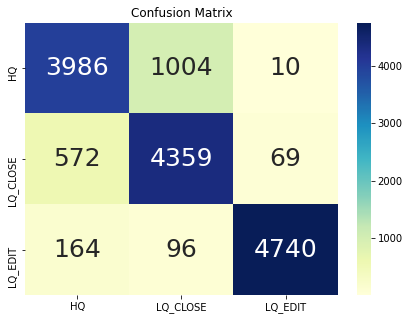

In [22]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB(1e-3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['BernoulliNB'] = accuracy_score(y_test, y_pred)

##Training The Model Using ComplementNB

Accuracy:	0.8378666666666666




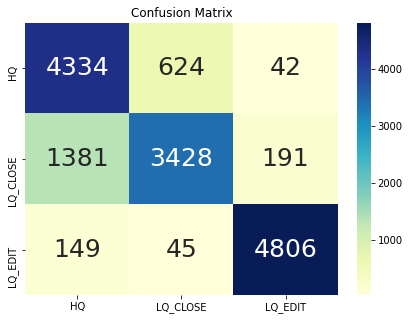

In [23]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['GaussianNB'] = accuracy_score(y_test, y_pred)

##Training The Model Using MultinomialNB

Accuracy:	0.8415333333333334




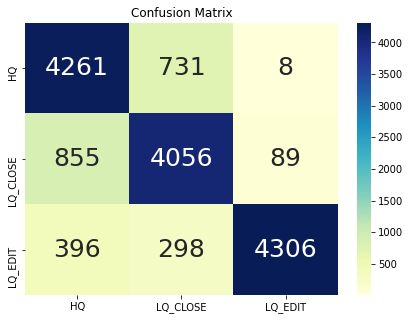

In [24]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=1e-10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['MultinomialNB'] = accuracy_score(y_test, y_pred)

##Training The Model Using LinearSVC

Accuracy:	0.8821333333333333




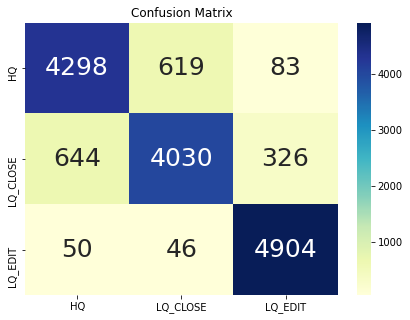

In [25]:
from sklearn.svm import LinearSVC

model = LinearSVC(random_state = 0, C=0.6)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['LinearSVC'] = accuracy_score(y_test, y_pred)

##Training The Model Using RandomForestClassifier

Accuracy:	0.8693333333333333




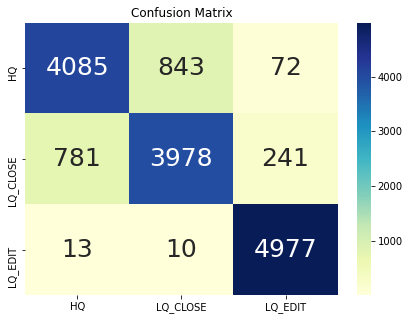

In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['RandomForestClassifier'] = accuracy_score(y_test, y_pred)

## Training The Model Using SGDClassifier

Accuracy:	0.8694




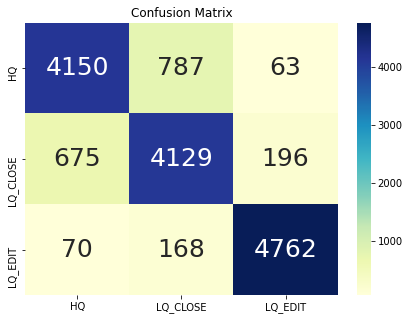

In [28]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(alpha=1e-6, random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['SGDClassifier'] = accuracy_score(y_test, y_pred)

## Training The Model Using LogisticRegression

Accuracy:	0.8863333333333333




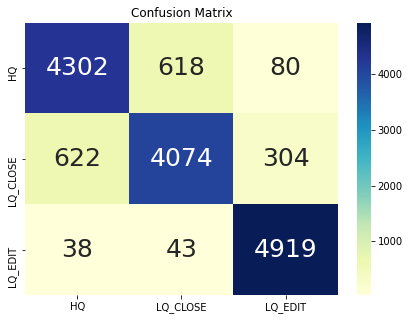

In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=2, max_iter=400, random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['LogisticRegression'] = accuracy_score(y_test, y_pred)

In [33]:
pd.DataFrame(data = acc.values(),
             index = acc.keys(),
             columns = ['Accuracy']).sort_values(ascending = False, by = ['Accuracy'])

,Accuracy
LogisticRegression,0.886333
LinearSVC,0.882133
BernoulliNB,0.872333
SGDClassifier,0.869400
RandomForestClassifier,0.869333
MultinomialNB,0.841533
GaussianNB,0.837867
